In [3]:
#N


In [1]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import Estimate
import figure 
from EconModel import cpptools
import pickle

from LimitedCommitmentModel import LimitedCommitmentModelClass

# plot style
linestyles = ['-','--','-.',':',':']
markers = ['o','s','D','*','P']
linewidth = 2
font_size = 17
font = {'size':font_size}
matplotlib.rc('font', **font)


plt.rcParams.update({'figure.max_open_warning': 0,'text.usetex': False})
path = 'output/'

SAVE = False

# c++ settings

do_compile = True
threads = 20
T = 20
#cpptools.setup_nlopt(folder='cppfuncs/', do_print = True) #install nlopt


In [2]:
#LOAD PICKLE (SEPERETAE FILE )
name = 'LC'
N = 5000
S = 100
do_distr_yerror = "norm"
do_yerror = 2
pickle_file = f'output/TRUEmodel_{name}_w_N{N}_S{S}_{do_distr_yerror}{do_yerror}_testFC.pickle'
with open(pickle_file, 'rb') as f:
    TrueLC_testFC_woman_N5000_norm2 = pickle.load(f)
pickle_file = f'output/TRUEmodel_{name}_w_N{N}_S{S}_{do_distr_yerror}{do_yerror}_testNC.pickle'
with open(pickle_file, 'rb') as f:
    TrueLC_testNC_woman_N5000_norm2 = pickle.load(f)


N = 10000
pickle_file = f'output/TRUEmodel_{name}_w_N{N}_S{S}_{do_distr_yerror}{do_yerror}_testFC.pickle'
with open(pickle_file, 'rb') as f:
    TrueLC_testFC_woman_N10000_norm2 = pickle.load(f)
pickle_file = f'output/TRUEmodel_{name}_w_N{N}_S{S}_{do_distr_yerror}{do_yerror}_testNC.pickle'
with open(pickle_file, 'rb') as f:
    TrueLC_testNC_woman_N10000_norm2 = pickle.load(f)

    
N = 5000
do_distr_yerror = "none"
do_yerror = 0
pickle_file = f'output/TRUEmodel_{name}_w_N{N}_S{S}_{do_distr_yerror}{do_yerror}_testFC.pickle'
with open(pickle_file, 'rb') as f:
    TrueLC_testFC_woman_N5000_none = pickle.load(f)
pickle_file = f'output/TRUEmodel_{name}_w_N{N}_S{S}_{do_distr_yerror}{do_yerror}_testNC.pickle'
with open(pickle_file, 'rb') as f:
    TrueLC_testNC_woman_N5000_none = pickle.load(f)

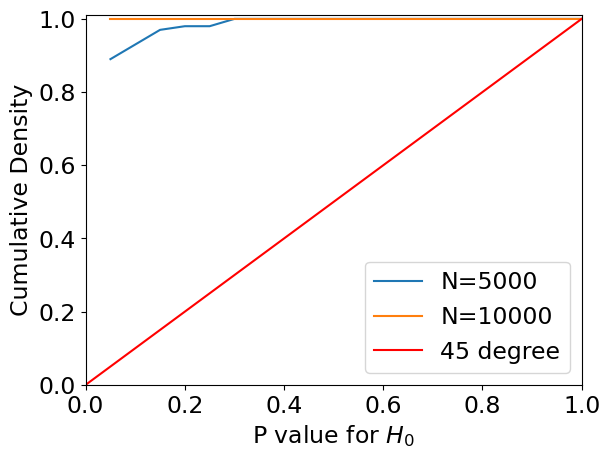

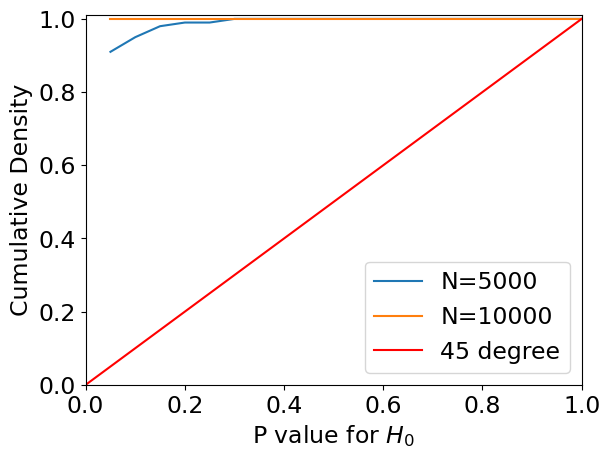

In [3]:
def fig_density_N(N5000, N10000):
    hist, bins = np.histogram(N5000, range = [0, 1], bins =20, density = True)
    hist = hist/20

    cumhist1 = np.cumsum(hist)


    hist, bins = np.histogram(N10000, range = [0, 1], bins =20, density = True)
    hist = hist/20
    cumhist2 = np.cumsum(hist)





    plt.plot(bins[1:], cumhist1, label="N=5000")
    plt.plot(bins[1:], cumhist2, label="N=10000")
    plt.plot(np.linspace(0.0,1.0, 10), np.linspace(0.0,1.0,10), label = "45 degree", color = 'red')
    plt.xlabel(f'P value for $H_0$')
    #plt.axvline(x= 0.05, color = 'red')
    plt.ylabel('Cumulative Density')
    plt.legend()
    plt.ylim(0,1.01)
    plt.xlim(0,1)
    #plt.savefig(f'output/Wald__TRUE{model_True}_{gender}_N{models.par.simN}_{save_fig}.png')
    plt.show()

    
j = 0   #est shadow
ik = 0  # est wage ["est_omega","true_omega", "wage"]
im = 1 #love True=0, false = 1

fig_density_N(TrueLC_testFC_woman_N5000_norm2[j,ik,im,:],TrueLC_testFC_woman_N10000_norm2[j,ik,im,:])
fig_density_N(TrueLC_testNC_woman_N5000_norm2[j,ik,im,:],TrueLC_testNC_woman_N10000_norm2[j,ik,im,:])

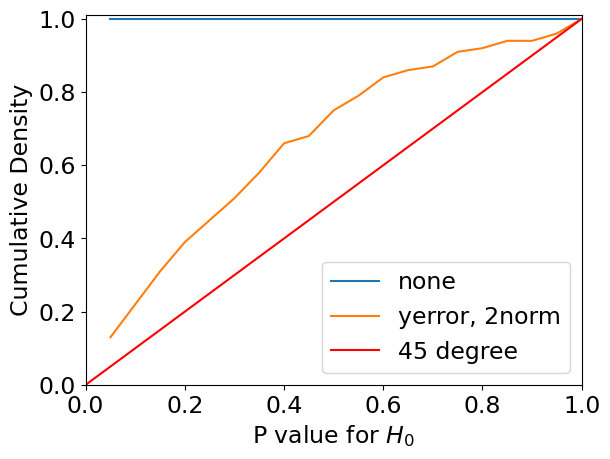

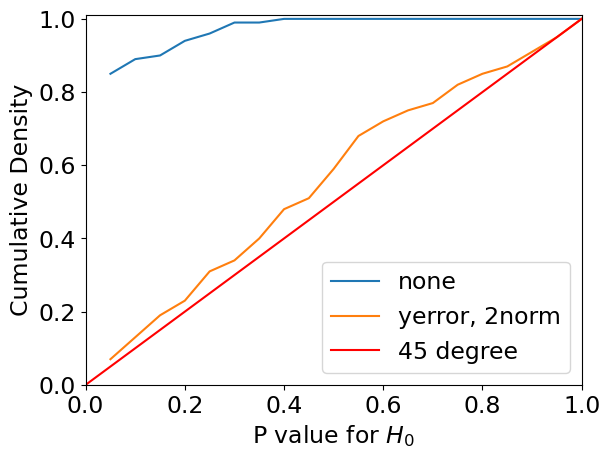

In [4]:
def fig_density_yerror(none, norm2):
    hist, bins = np.histogram(none, range = [0, 1], bins =20, density = True)
    hist = hist/20

    cumhist1 = np.cumsum(hist)


    hist, bins = np.histogram(norm2, range = [0, 1], bins =20, density = True)
    hist = hist/20
    cumhist2 = np.cumsum(hist)


    plt.plot(bins[1:], cumhist1, label="none")
    plt.plot(bins[1:], cumhist2, label="yerror, 2norm")
    plt.plot(np.linspace(0.0,1.0, 10), np.linspace(0.0,1.0,10), label = "45 degree", color = 'red')
    plt.xlabel(f'P value for $H_0$')
    #plt.axvline(x= 0.05, color = 'red')
    plt.ylabel('Cumulative Density')
    plt.legend()
    plt.ylim(0,1.01)
    plt.xlim(0,1)
    #plt.savefig(f'output/Wald__TRUE{model_True}_{gender}_N{models.par.simN}_{save_fig}.png')
    plt.show()

    
j = 3   #est shadow
ik = 0  # est wage ["est_omega","true_omega", "wage"]
im = 1 #love True=0, false = 1


fig_density_yerror(TrueLC_testFC_woman_N5000_none[j,ik,im,:],TrueLC_testFC_woman_N5000_norm2[j,ik,im,:])
fig_density_yerror(TrueLC_testNC_woman_N5000_none[j,ik,im,:],TrueLC_testNC_woman_N5000_norm2[j,ik,im,:])

In [5]:
print(TrueLC_testFC_woman_N5000_none[j,ik,im,:] )
print(TrueLC_testFC_woman_N5000_norm2[j,ik,im,:])

[5.56227621e-43 1.39337218e-66 8.74853438e-57 4.77675317e-52
 1.24614026e-71 7.13616586e-58 2.71755169e-55 2.04037078e-66
 1.12950544e-51 6.22293011e-53 3.37285997e-60 2.08729769e-62
 1.00920413e-66 1.02279942e-38 7.47346430e-45 2.65787624e-52
 2.89108696e-67 4.13425376e-49 2.08366618e-58 2.17650153e-52
 2.23920898e-39 2.48482866e-57 2.21327736e-54 2.04113933e-65
 2.60832930e-80 1.69202500e-30 3.49537194e-59 1.40403956e-43
 2.90197026e-57 9.77359433e-59 1.89603729e-74 7.51365495e-29
 5.74999931e-64 1.30881137e-43 6.24787269e-36 2.11039772e-35
 8.27758358e-34 4.22613870e-38 1.27771668e-49 4.73451376e-48
 5.26586528e-68 4.25945106e-35 8.05690553e-40 1.57978613e-39
 8.87386708e-26 1.11818451e-70 1.55500923e-47 1.92602248e-30
 3.24919488e-57 7.83844538e-49 2.25764385e-52 1.44521285e-47
 2.81220065e-72 1.64196183e-60 4.10105715e-33 4.08096663e-79
 7.13288123e-55 2.11909701e-40 1.28622932e-75 2.14190763e-42
 2.13386559e-61 7.25224586e-50 3.98570938e-49 1.73897940e-69
 1.03845091e-70 3.396651